In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.matplotlib import Inferno_20 as palette
import scipy

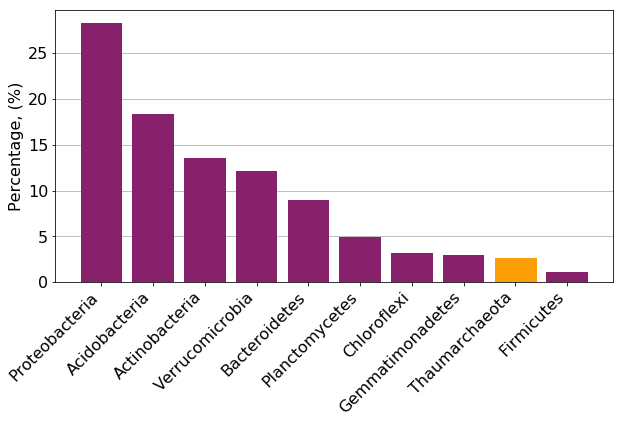

96.15649639907794


In [10]:
tax = pd.read_csv('../taxonomy/renamed_L2.txt', 
                  header=1, 
                  index_col=0,
                  sep='\t')
cols = []
for num in range(8,38):
    cols.append('515rcbc' + str(num))
tax = tax[cols]
tax = tax*100
tax['total'] = tax.sum(axis=1)
tax['total_perc'] = tax[['total']]*100/tax[['total']].sum()
top = tax[['total_perc']].sum(axis=1).sort_values(ascending=False)[:10]
def plot_tax(ser):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(10,5))
    val = ser.values
    xlabels = []
    for phyl in ser.index.tolist():
        xlabels.append(phyl.split(';P:')[1])
    bars = ax.bar(xlabels,val, color=palette.hex_colors[7])
    bars[8].set_color(palette.hex_colors[15])
    ax.set_xticklabels(xlabels)
    plt.ylabel('Percentage, (%)', fontsize=16)
    plt.xticks(rotation=45, fontsize=16, ha='right')
    ax.set_axisbelow(True)
    plt.grid(axis='y')
    plt.savefig('./top_10.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(val.sum())
plot_tax(top)

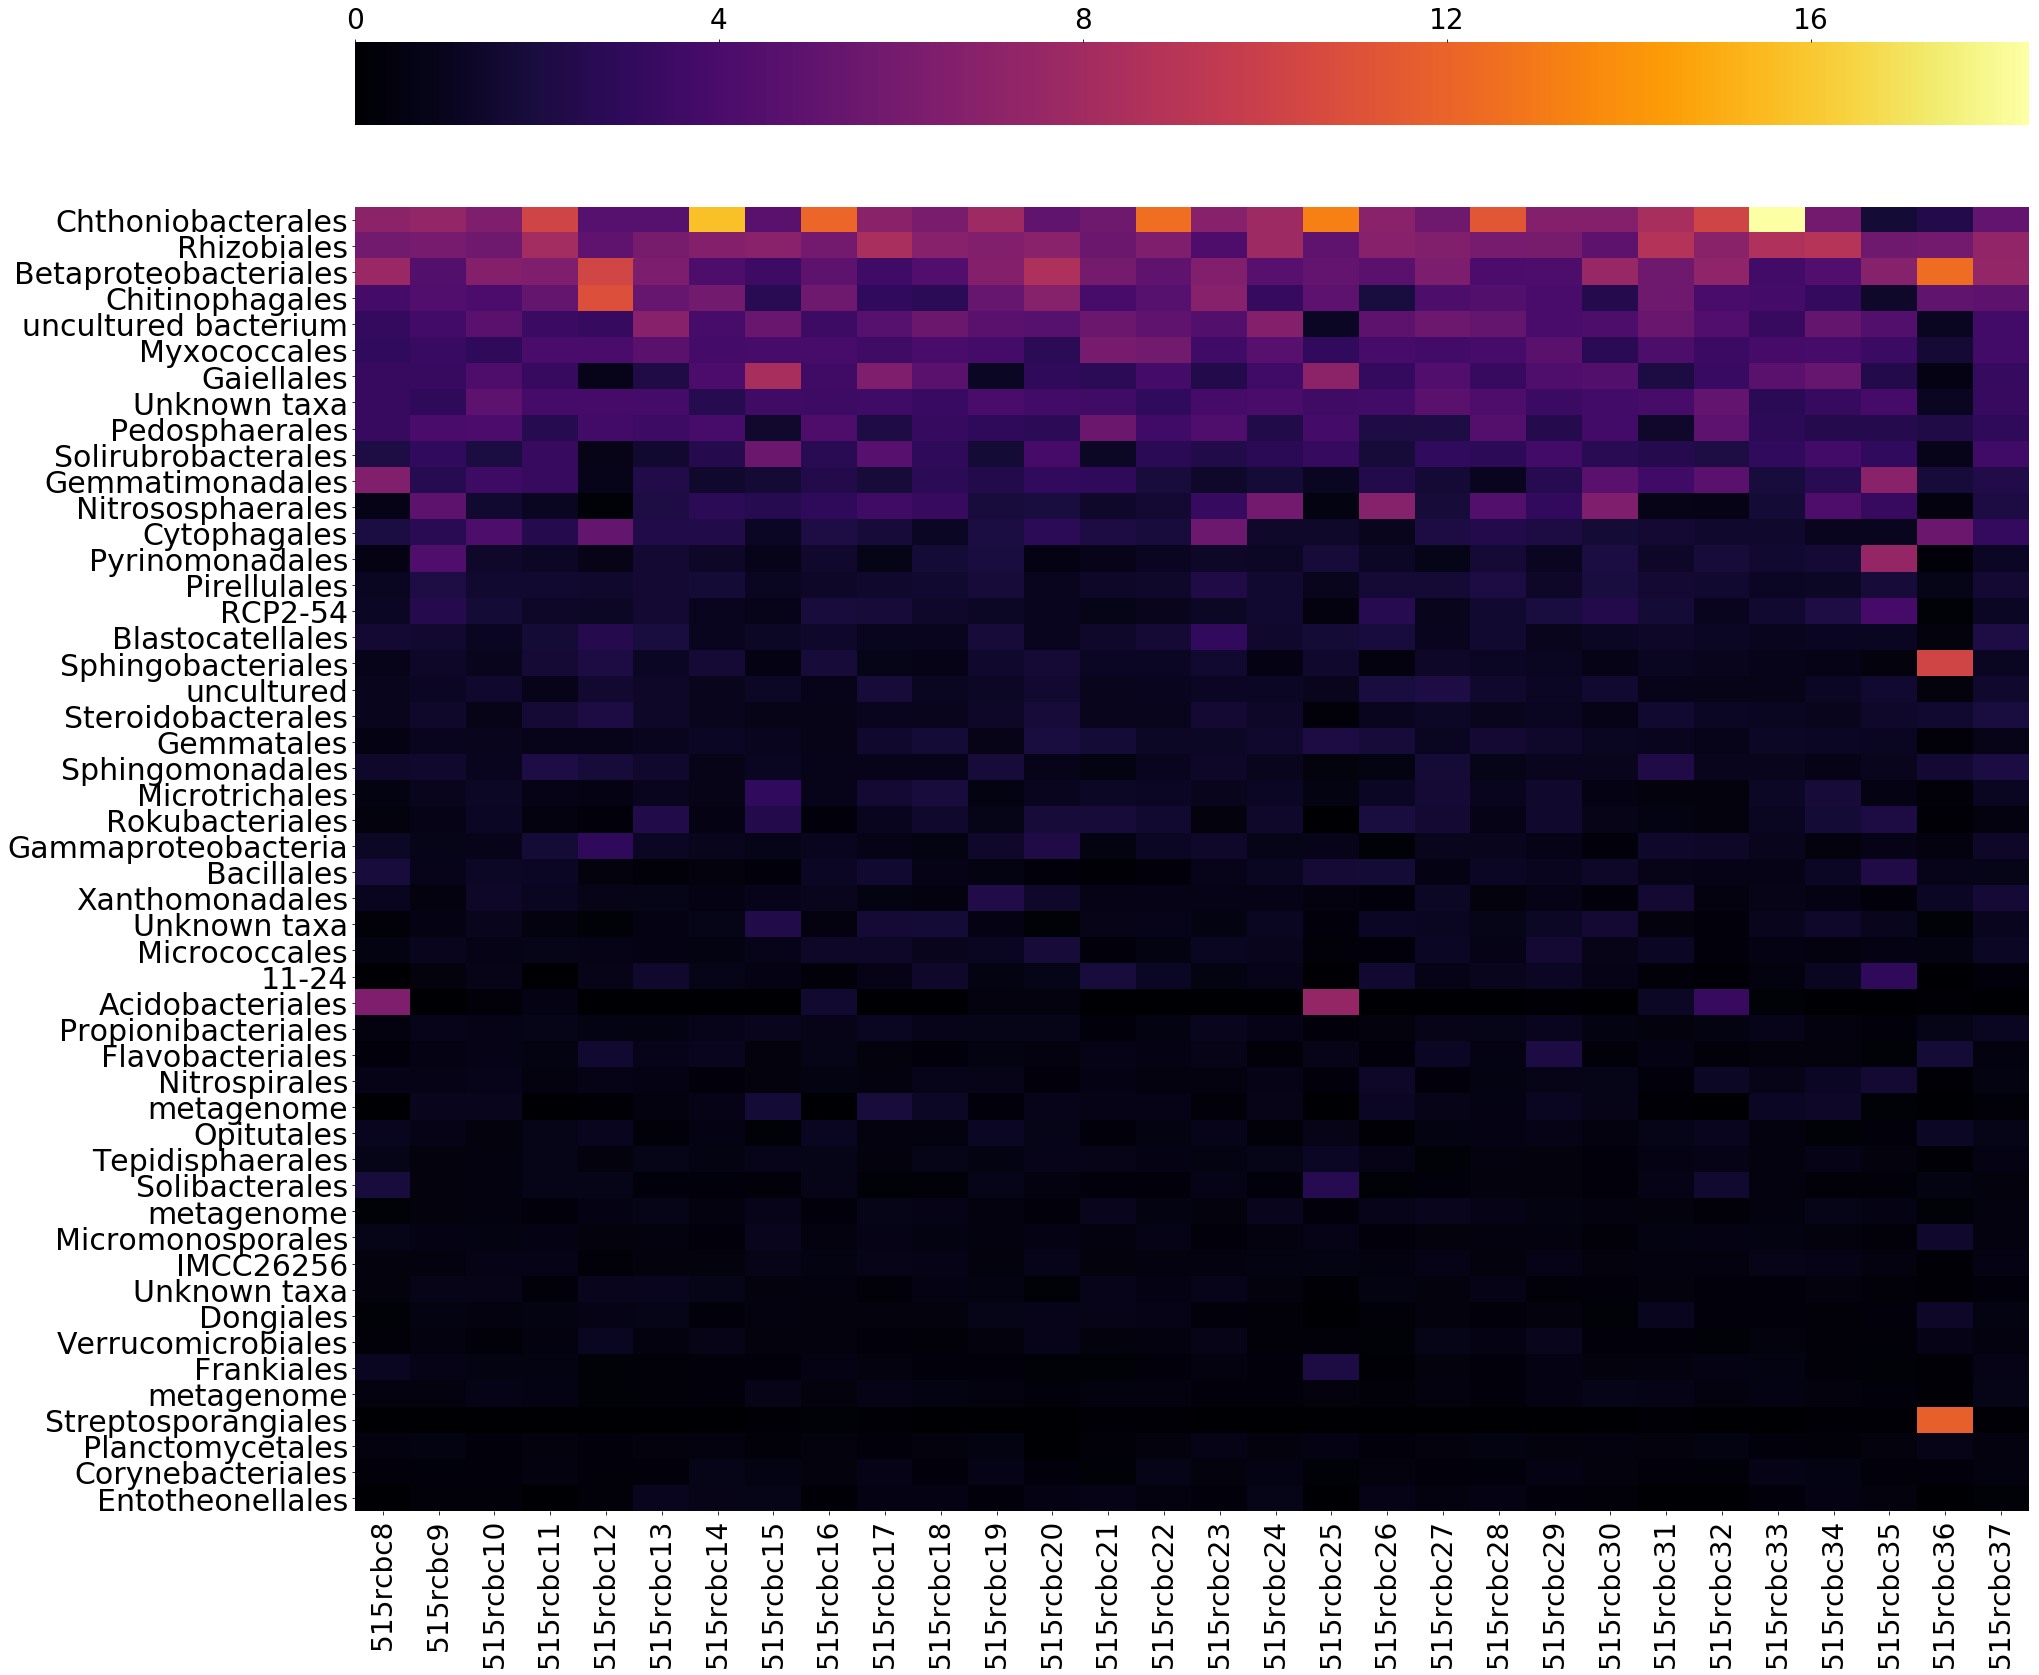

In [6]:
def plot_tax_heat(dataframe, title=False, savename=False, dpi=100, figsize=(30,150)):
    matplotlib.rcParams.update({'font.size': 28})
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(ax=ax, 
                data=dataframe,
                yticklabels=True, 
                cbar=True,
                cmap=palette.mpl_colormap,
                cbar_kws=dict(use_gridspec=False,
                              shrink=1,
                              location='top',
                             ))
    for label in ax.get_yticklabels():
        label.set_size(30)
    if title:
        plt.title(title, fontsize=40)
    plt.ylabel('')
    plt.xlabel('')
    if savename:
        plt.savefig(savename, 
                    bbox_inches='tight', 
                    dpi=dpi)
    plt.show()

l4_tax = pd.read_csv("../taxonomy/renamed_L4.txt",
                 header=1,
                 index_col=0,
                 sep='\t')
cols = []
for num in range(8,38):
    cols.append('515rcbc' + str(num))
l4_tax = l4_tax[cols]
l4_tax = l4_tax*100
l4_tax['mean'] = l4_tax.mean(axis=1)
l4_tax.sort_values('mean', ascending=False, inplace=True)
l4_tax.drop("mean",
        axis=1, 
        inplace=True)
l4_tax_trunc = l4_tax[:50]
newind = {}
for item in l4_tax_trunc.index:
    try:
        newname = item.split(';O:')[1]
    except:
        newname = "Unknown taxa"
    if len(newname) > 20:
        newname = newname.split(" ")[0]
    newind[item] = newname
l4_tax_trunc.rename(index=newind)
plot_tax_heat(l4_tax_trunc.rename(index=newind),dpi=100,figsize=(30,30),savename="./taxonomy.png")

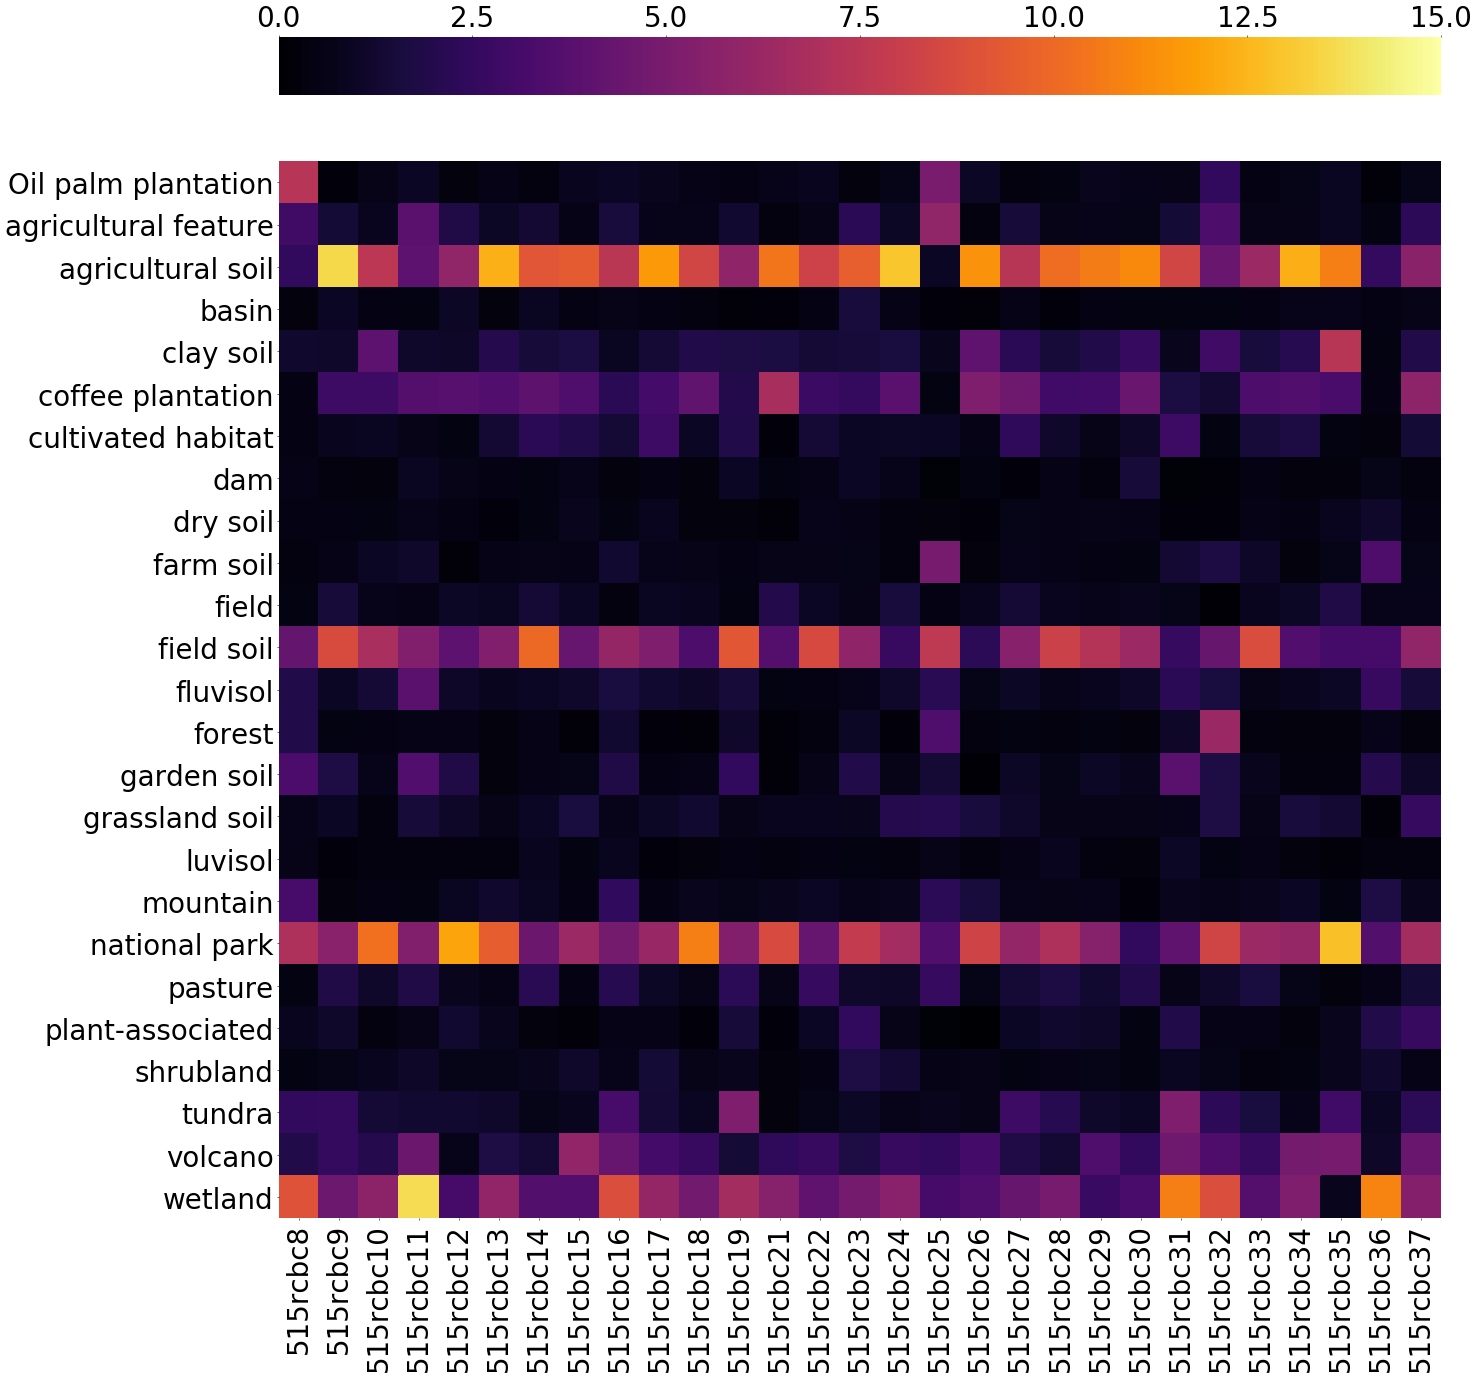

,515rcbc8,515rcbc9,515rcbc10,515rcbc11,515rcbc12,515rcbc13,515rcbc14,515rcbc15,515rcbc16,515rcbc17,...,515rcbc28,515rcbc29,515rcbc30,515rcbc31,515rcbc32,515rcbc33,515rcbc34,515rcbc35,515rcbc36,515rcbc37
Oil palm plantation,7.35,0.28,0.65,0.98,0.30,0.55,0.37,0.83,0.95,0.79,...,0.45,0.78,0.74,0.68,2.48,0.49,0.60,0.92,0.19,0.63
agricultural feature,2.92,1.42,0.83,3.92,1.82,1.02,1.32,0.58,1.57,0.72,...,0.69,0.75,0.61,1.45,3.35,0.68,0.66,0.93,0.46,2.33
agricultural soil,2.50,13.58,7.55,3.94,5.86,12.36,9.19,9.38,7.49,11.62,...,10.18,10.68,11.13,8.39,4.42,6.32,12.28,10.78,2.53,5.64
basin,0.31,0.95,0.51,0.45,1.05,0.33,0.92,0.48,0.65,0.48,...,0.28,0.51,0.45,0.42,0.44,0.47,0.75,0.76,0.47,0.67
clay soil,1.22,1.12,3.95,1.17,1.08,2.05,1.51,1.68,0.91,1.35,...,1.52,1.93,2.63,0.78,2.88,1.58,2.09,7.42,0.42,1.88
coffee plantation,0.48,2.87,2.84,3.67,3.75,3.57,4.04,3.50,2.21,3.10,...,2.97,3.01,4.45,1.69,1.33,3.39,3.55,3.27,0.49,5.75
cultivated habitat,0.48,0.84,0.88,0.67,0.46,1.32,2.18,1.92,1.35,2.84,...,1.14,0.68,1.08,2.82,0.43,1.49,1.75,0.42,0.35,1.42
dam,0.54,0.37,0.32,0.93,0.68,0.47,0.42,0.75,0.32,0.52,...,0.53,0.40,1.50,0.15,0.22,0.48,0.32,0.32,0.61,0.41
dry soil,0.51,0.47,0.43,0.71,0.50,0.24,0.42,0.78,0.45,0.85,...,0.57,0.65,0.53,0.28,0.28,0.58,0.52,0.84,1.12,0.51
farm soil,0.37,0.56,0.99,1.12,0.20,0.55,0.67,0.58,1.25,0.76,...,0.55,0.51,0.45,1.32,1.73,1.08,0.35,0.62,3.41,0.61


In [11]:
sourcetrack = pd.read_csv('../sourcetracker/mixing_proportions.txt', 
                          sep='\t', 
                          header=0, 
                          index_col=0)
sourcetrack.rename(columns={'plant-associated habitat':'plant-associated'}, 
                   inplace=True)
sns_sourcetrack = (sourcetrack*100).round(2)

sns_sourcetrack = sns_sourcetrack.T[sns_sourcetrack.sum()>13]

def plot_sourcetrack(dataframe, 
                     title=False, 
                     savename=False,):
    matplotlib.rcParams.update({'font.size': 40})
    fig, ax = plt.subplots(figsize=(30,35), dpi=50)    
    data = dataframe.drop('Unknown', axis=0)
    sns.heatmap(data,
                ax=ax,
                vmin=0,
                vmax=15,
                cbar=True,
                cmap=palette.mpl_colormap,
                cbar_kws=dict(use_gridspec=False,
                              shrink=1,
                              location='top',
                             )
               )
    if savename:
        plt.savefig(savename, bbox_inches='tight')
    plt.show()
    
plot_sourcetrack(sns_sourcetrack,savename='heatmap_perc.png')
sns_sourcetrack


In [12]:
sourcetrack = pd.read_csv('../sourcetracker/mixing_proportions.txt', 
                          sep='\t', 
                          header=0, 
                          index_col=0)
new = sourcetrack.T
new['top'] = (new.sum(axis=1)*100/29)
new[['top']].sort_values('top', ascending=False)

,top
Unknown,44.852785
agricultural soil,8.312997
national park,6.741645
wetland,5.617241
field soil,5.583289
coffee plantation,3.182493
volcano,2.840318
clay soil,1.932361
tundra,1.709549
agricultural feature,1.452785


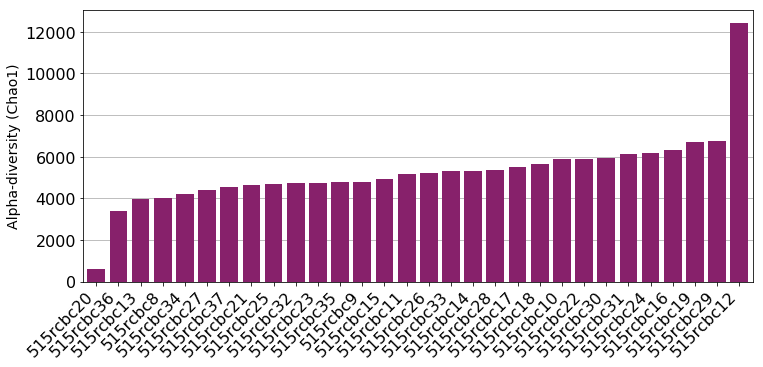

In [13]:
def plot_alpha(dataframe, 
               metric, 
               title=False, 
               savename=False, 
               dpi=100, 
               ylabel=False, 
               xlabel=False):
    matplotlib.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(12,5))
    dataframe = dataframe.sort_values(metric, axis=0)
    plt.bar(dataframe.index, dataframe[metric], color=palette.hex_colors[7], width=0.8)
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.ylabel(metric, fontsize=14)
    plt.xlim(-0.6, len(dataframe.index)-0.4)
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    if title:
        plt.title(title, fontsize=18)
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    if savename:
        plt.savefig(savename, dpi=dpi, bbox_inches='tight')

    plt.show()
alpha = pd.read_csv('../analyses/alphadiv.tsv',sep='\t', index_col=0)
alpha = alpha.sort_index()
alpha
plot_alpha(alpha, 
           'chao1', 
           savename='./chao1_alpha.png', 
           ylabel="Alpha-diversity (Chao1)", 
           dpi=300)

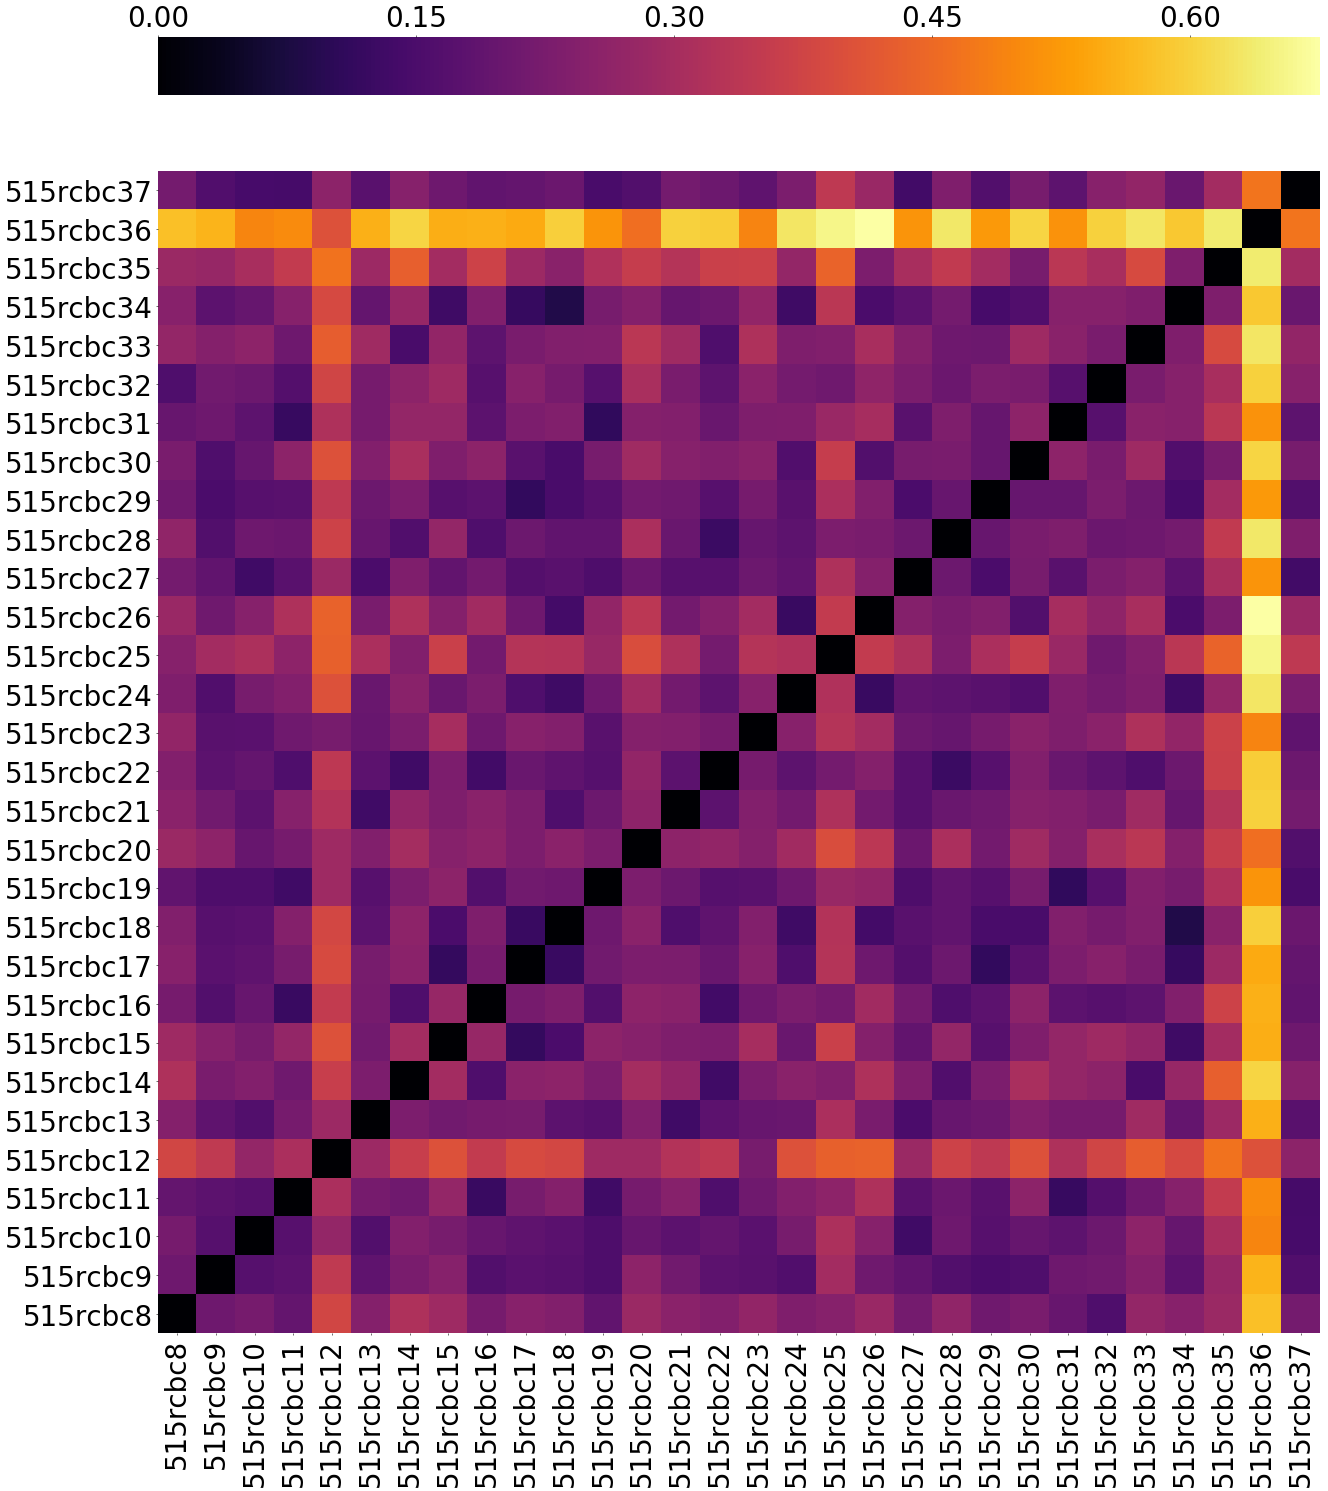

In [14]:
def sort_df(dataframe):
    cols = []
    for num in range(8,38):
        cols.append('515rcbc'+str(num))
    dataframe = dataframe.reindex(reversed(cols))
    return dataframe[cols]

def plot_heatmap(dataframe, 
                 title=False, 
                 savename=False, 
                 fmt='d', 
                 annot=True, 
                 cbar=True):
    matplotlib.rcParams.update({'font.size': 40})

    fig, ax = plt.subplots(figsize=(30,40), dpi=50)
    hmp = sns.heatmap(ax=ax,
                data=dataframe,
                square=True,
                annot=annot,
                fmt=fmt,
                annot_kws={"size":8},
                cbar=cbar,
                cmap=palette.mpl_colormap,
                cbar_kws=dict(use_gridspec=False,
                              shrink=1,
                              location='top',
                             )
               )
    if title:
        plt.title(title, fontsize=40)
    if savename:
        plt.savefig(savename, bbox_inches='tight')
    plt.show()

beta_unweight = pd.read_csv('../analyses/beta_diversity/weighted_unifrac_otu_table.txt', 
                            sep='\t', 
                            index_col=0)
beta_unweight = sort_df(beta_unweight)
plot_heatmap(beta_unweight, 
             fmt='.4f', 
             savename='./unweighted_beta.png', 
             cbar=True, 
             annot=False)